## Outliers detection and removal approachers
- Identifying outliers with visualization
- Z-score method
- interquartile range method(IQR) method
- Compare skewness

## Import data and required packages
### importing pandas,numpy,matplotlivb,seaborn and warning library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import csv data as pandas dataframe

In [2]:
df = pd.read_csv('C:/Users/suhas/EDA_FULL_CASE_STUDY/Outlier_detection_and_removal/cleaned.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Identifying outliers with visualization

In [4]:
num_features = [features for features in df.columns if df[features].dtypes !='O']

In [5]:
num_df = df[num_features]
num_df.head()

,math score,reading score,writing score,total_score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


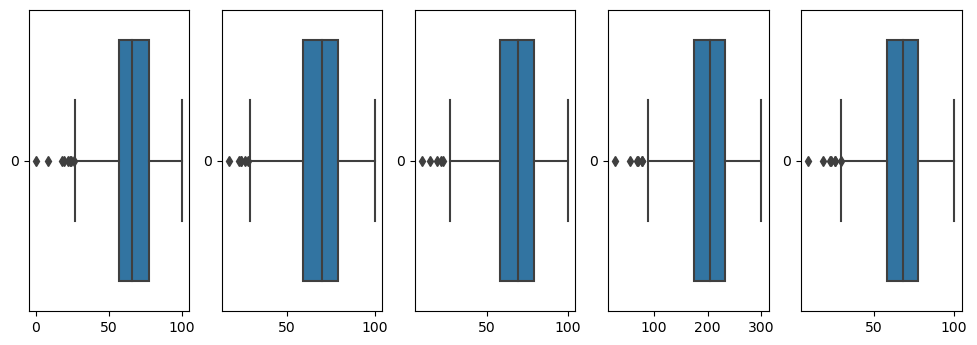

In [6]:
plt.figure(figsize = (22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col],orient='h')

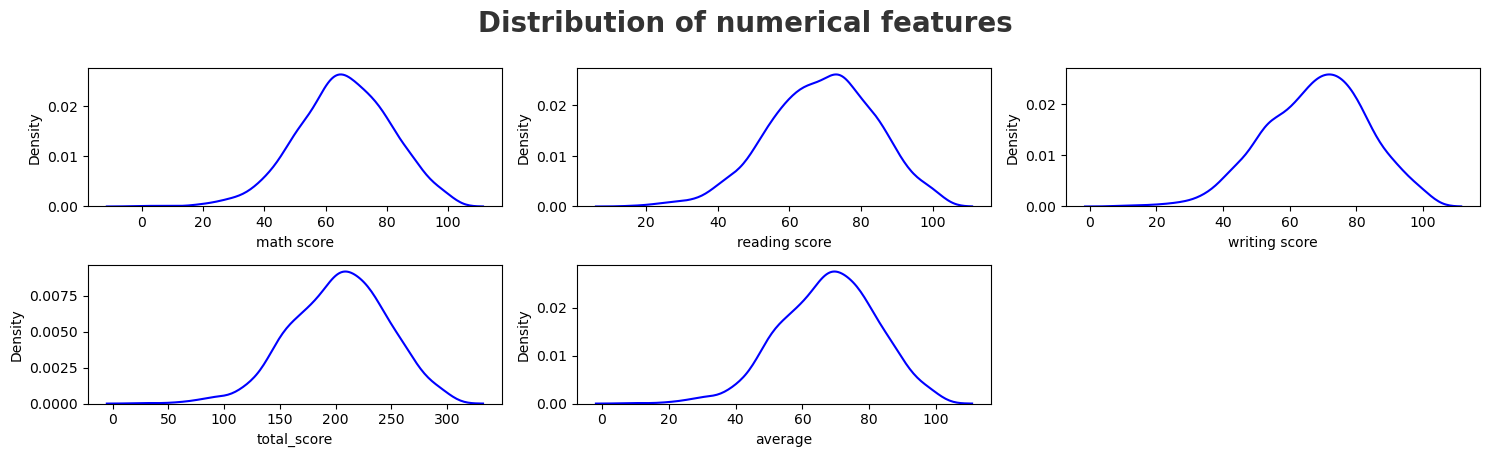

In [7]:
plt.figure(figsize=(15,10))
plt.suptitle('Distribution of numerical features' , fontsize = 20 , fontweight = 'bold',alpha=0.8,y=1)
for i in range(len(num_features)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[num_features[i]],color = 'blue',hist=False)
    plt.xlabel(num_features[i])
    plt.tight_layout()

## Insights
- The outliers are there as there are manay data points which lie awaya from maximum points

## Counting the number of outliers present in each numeric column

In [8]:
obj = ['race/ethnicity','parental level of education','lunch','test preparation course','gender']
def count_outliers(data,col):
    q1 = data[col].quantile(0.25,interpolation='nearest')
    q2 = data[col].quantile(0.5,interpolation='nearest')
    q3 = data[col].quantile(0.75,interpolation='nearest')
    q4 = data[col].quantile(1,interpolation='nearest')
    IQR = q3-q1
    global LLP
    global ULP
    LLP = q1-1.5*IQR
    ULP = q3+1.5*IQR
    if data[col].min() > LLP and data[col].max()<ULP:
        print('No outliers in')
    else:
        print("There are outliers in ",i)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>ULP][col].size
        a.append(i)
        print('Count ofoutliers are:',x+y)
global a
a = []
x = df.drop(obj,axis =1 )
for i in x.columns:
    count_outliers(x,i)

There are outliers in  math score
Count ofoutliers are: 8
There are outliers in  reading score
Count ofoutliers are: 6
There are outliers in  writing score
Count ofoutliers are: 5
There are outliers in  total_score
Count ofoutliers are: 6
There are outliers in  average
Count ofoutliers are: 7


## Z-score method

### Z-score
- the numberof standard deviation awaya from the mean that a particular observation is
- A negative Z-score means an observation is below mean
- while a positive z-score means its above the mean
- The further away from 0 the z-score is the further away from the mean your obersvation is

In [9]:
#function to detect the outlier
def outlier_thresholds(dataframe , variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    Interqauntile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*Interqauntile_range
    low_limit = quartile1 - 1.5*Interqauntile_range
    return low_limit,up_limit

In [10]:
#function to remove the outlier
def replace_with_threshold(dataframe,num_features):
    for variable in num_features:
        low_limit,up_limit = outlier_thresholds(dataframe,variable)
        dataframe.loc[(dataframe[variable] < low_limit),variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit),variable] = up_limit
        print(up_limit,low_limit)

In [11]:
replace_with_threshold(num_df,num_df.columns)

144.5 -11.5
141.25000000000006 -3.150000000000034
145.5 -10.5
421.65 -14.749999999999972
140.55 -4.916666666666686


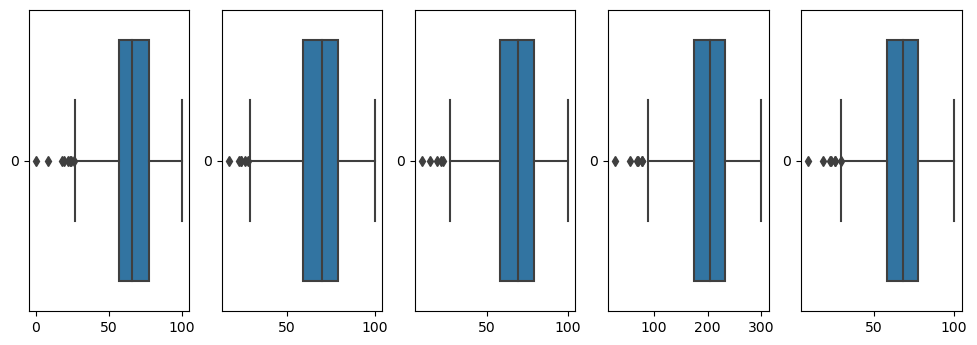

In [12]:
plt.figure(figsize = (22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col],orient='h')

In [13]:
num_df

,math score,reading score,writing score,total_score,average
0,72.0,72.0,74.0,218.0,72.666667
1,69.0,90.0,88.0,247.0,82.333333
2,90.0,95.0,93.0,278.0,92.666667
3,47.0,57.0,44.0,148.0,49.333333
4,76.0,78.0,75.0,229.0,76.333333
...,...,...,...,...,...
995,88.0,99.0,95.0,282.0,94.000000
996,62.0,55.0,55.0,172.0,57.333333
997,59.0,71.0,65.0,195.0,65.000000
998,68.0,78.0,77.0,223.0,74.333333


## Insights
- As we can see from above boxplots outliers are not removed properly

## Interquartile range method 

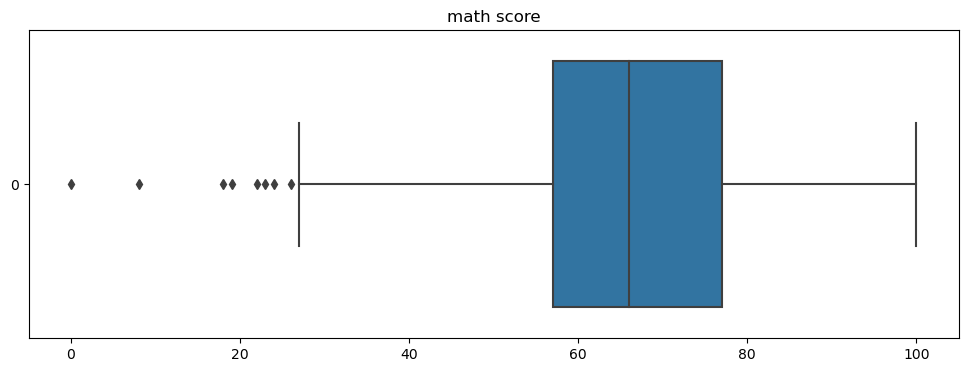

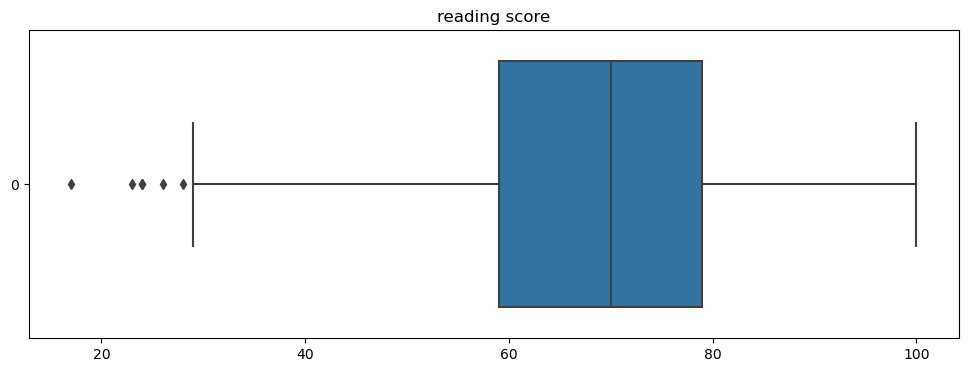

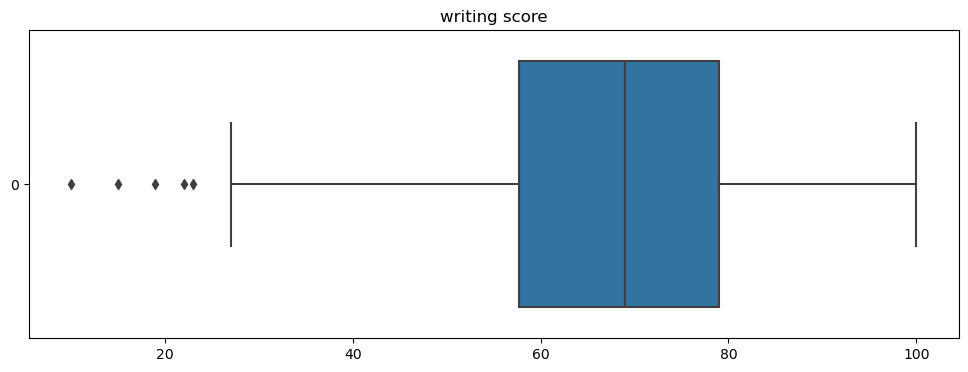

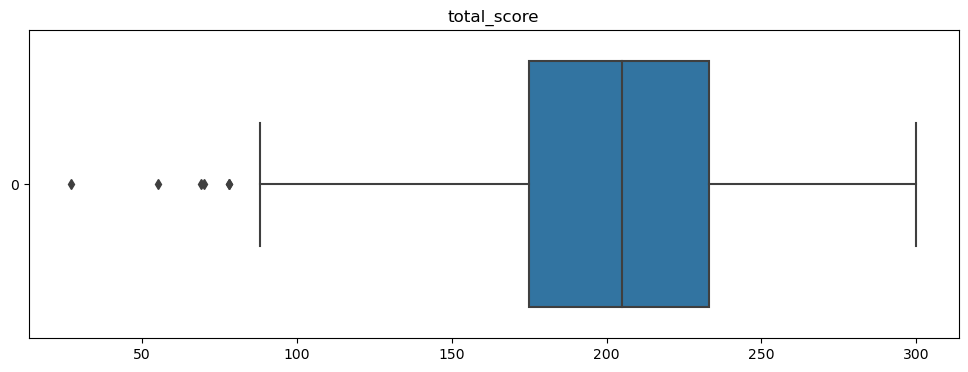

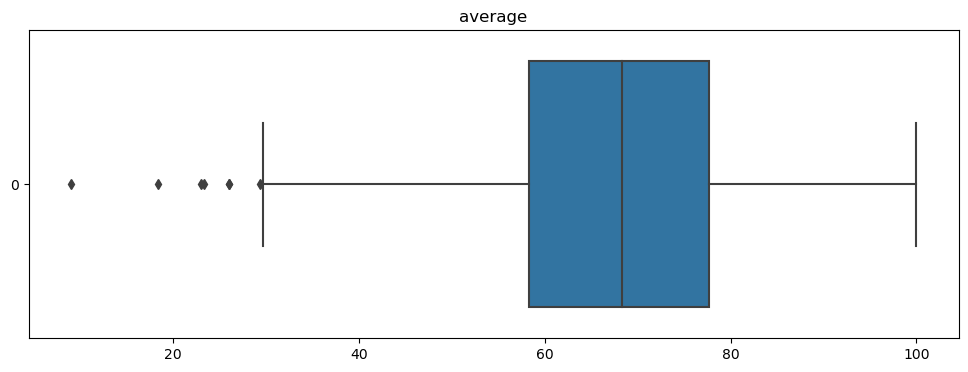

In [14]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col],orient='h')
    plt.title(col)

In [33]:
df1 = df.copy()
def remove_outliers_IQR(col):
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print('percentile25',percentile25)
    print('percentile75',percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5* iqr
    lower_limit = percentile25 - 1.5*iqr
    print('Upper limit:',upper_limit)
    print('Lower limit',lower_limit)
    df1[col] = np.where(df1[col]>upper_limit,upper_limit,np.where(df1[col]< lower_limit,lower_limit,df1[col]))
    return df[df[col] > lower_limit] 

In [34]:
remove_outliers_IQR('math score')

percentile25 57.0
percentile75 77.0
Upper limit: 107.0
Lower limit 27.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [35]:
# creating comparison plot
def create_comparison_plot(df,df1,col):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[col])
    
    plt.subplot(2,2,2)
    sns.boxplot(df[col],orient='h')
    
    plt.subplot(2,2,3)
    sns.distplot(df1[col])
    
    plt.subplot(2,2,4)
    sns.boxplot(df1[col],orient='h')
    plt.show()

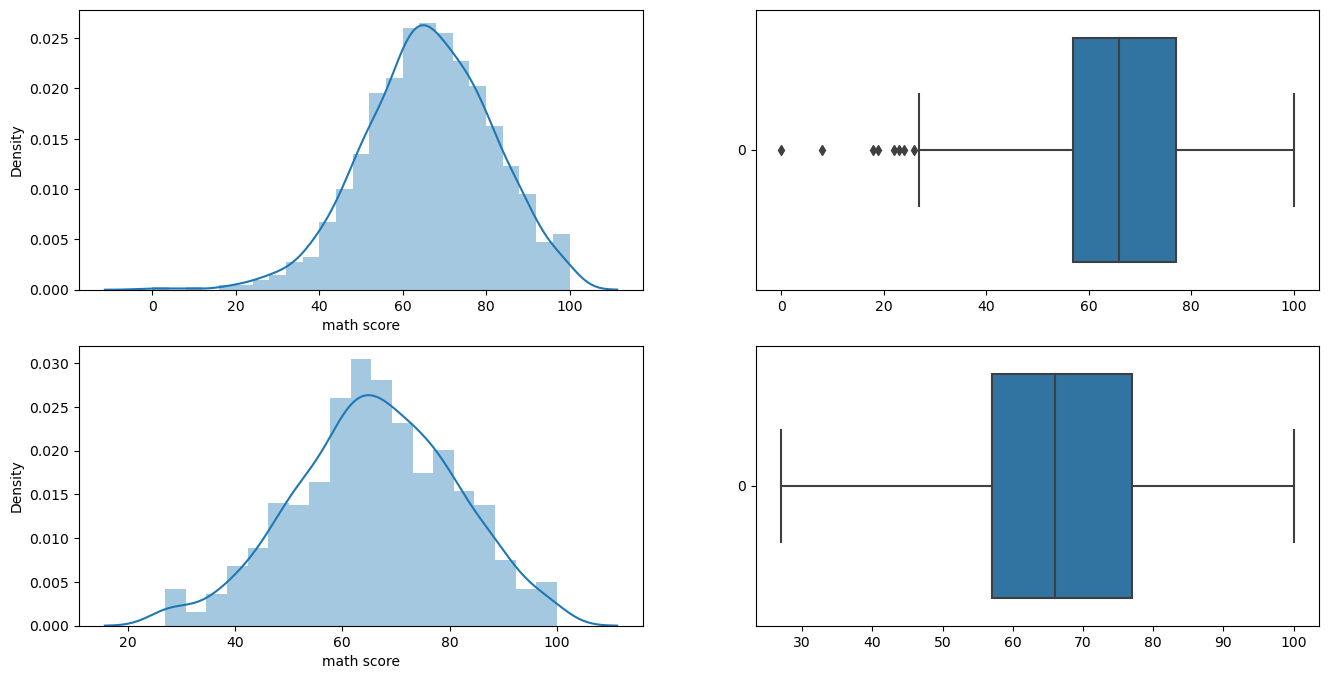

In [36]:
create_comparison_plot(df,df1,'math score')

In [37]:
remove_outliers_IQR('reading score')

percentile25 59.0
percentile75 79.0
Upper limit: 109.0
Lower limit 29.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


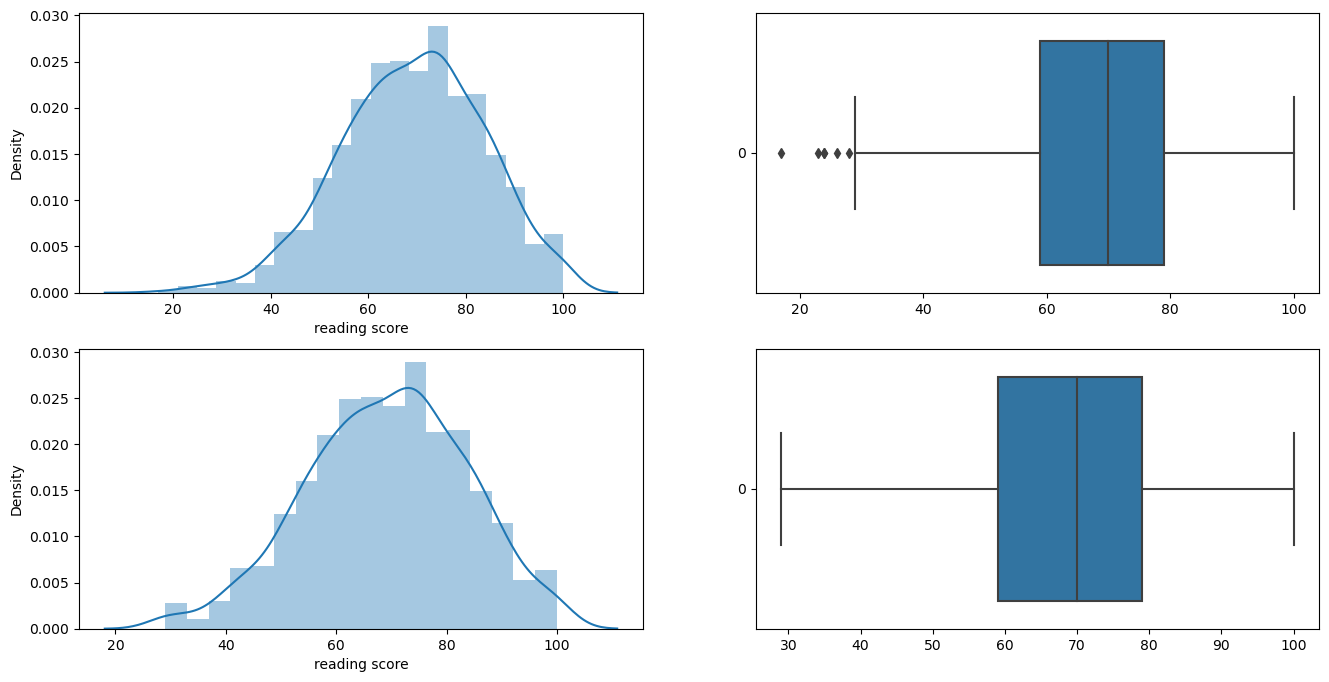

In [38]:
create_comparison_plot(df,df1,'reading score')

In [39]:
remove_outliers_IQR('writing score')

percentile25 57.75
percentile75 79.0
Upper limit: 110.875
Lower limit 25.875


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


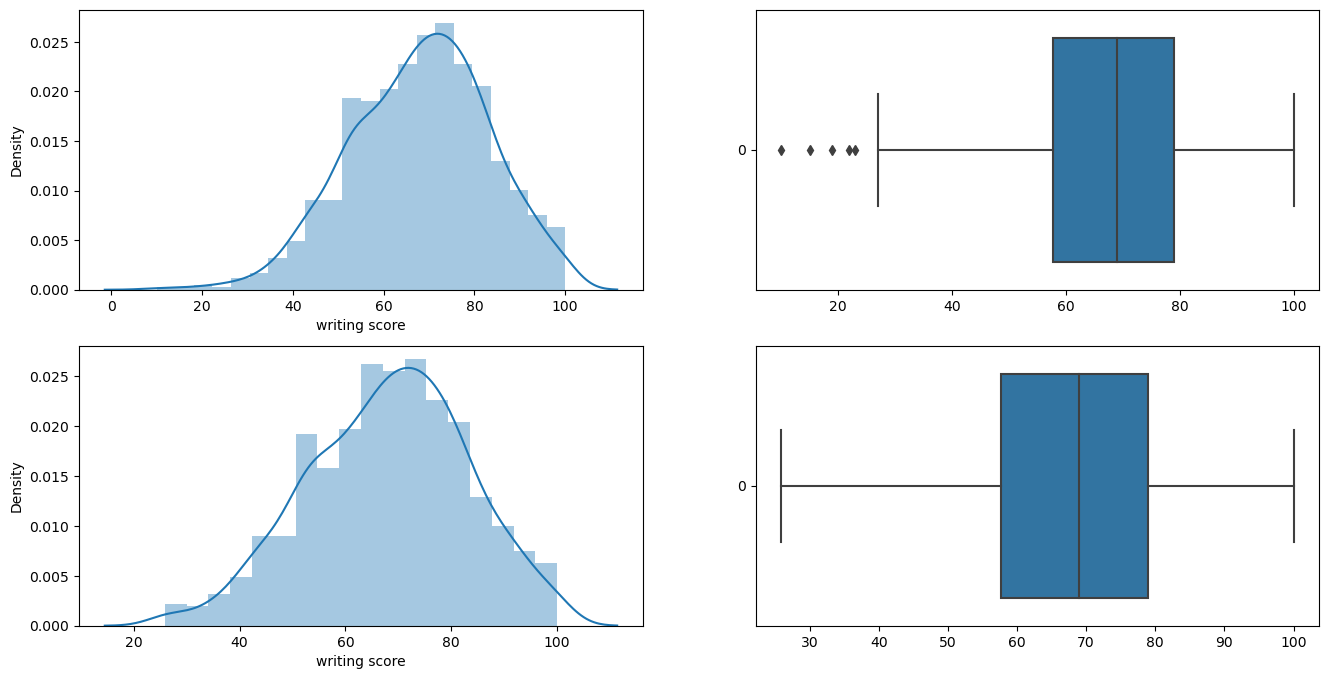

In [40]:
create_comparison_plot(df,df1,'writing score')

In [41]:
remove_outliers_IQR('total_score')

percentile25 175.0
percentile75 233.0
Upper limit: 320.0
Lower limit 88.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


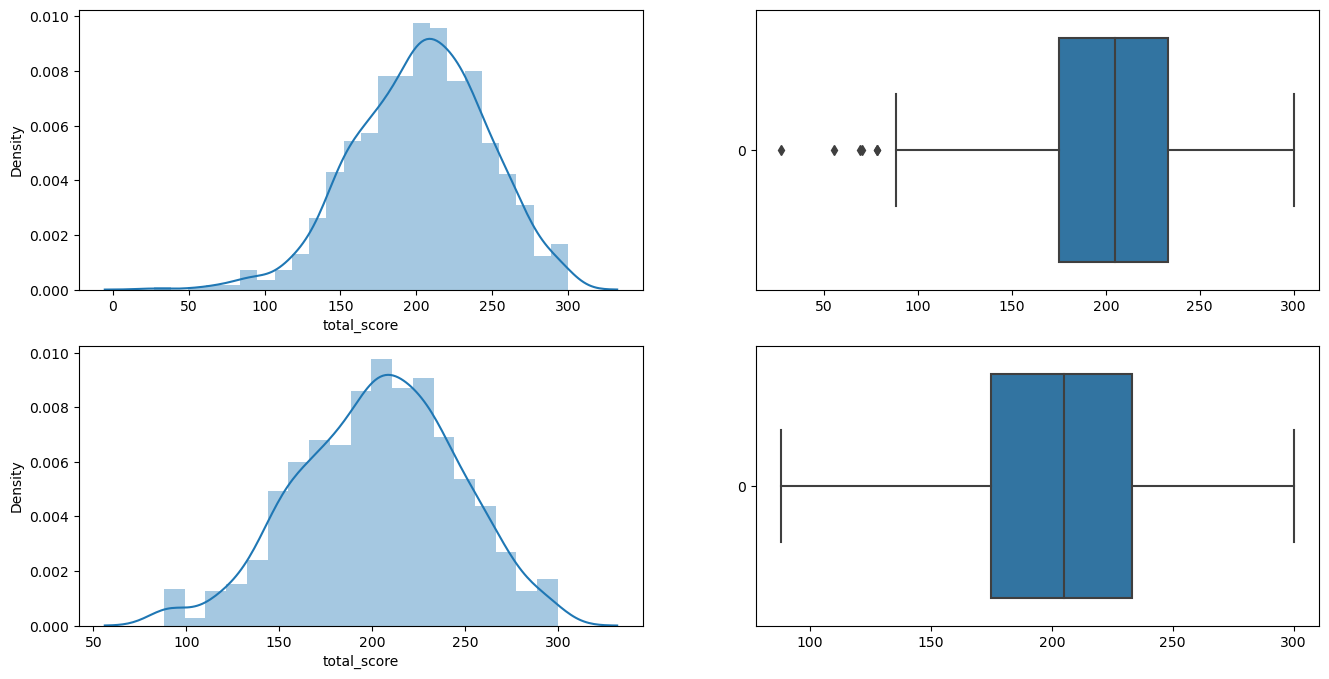

In [42]:
create_comparison_plot(df,df1,'total_score')

In [43]:
remove_outliers_IQR('average')

percentile25 58.333333333333336
percentile75 77.66666666666667
Upper limit: 106.66666666666667
Lower limit 29.333333333333332


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


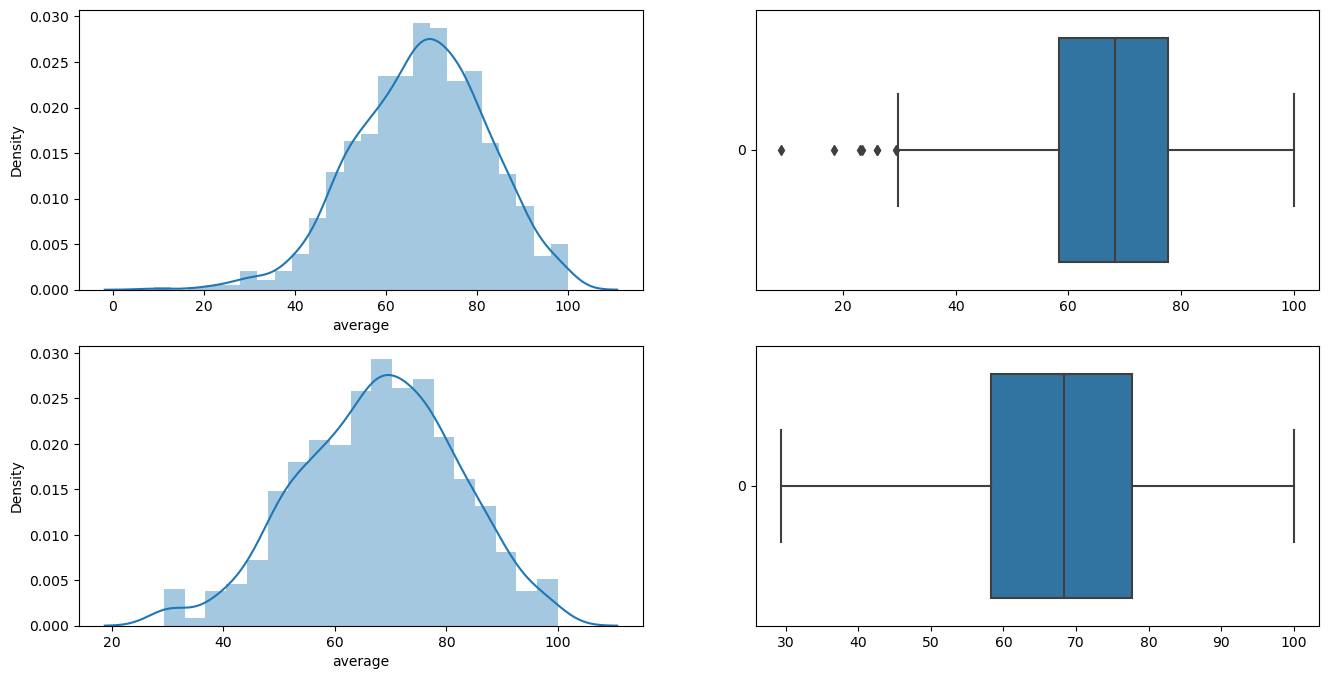

In [44]:
create_comparison_plot(df,df1,'average')

In [47]:
df[num_features].skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
total_score     -0.299057
average         -0.299057
dtype: float64

In [48]:
df1[num_features].skew()

math score      -0.148833
reading score   -0.209790
writing score   -0.223701
total_score     -0.210374
average         -0.210374
dtype: float64

### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [49]:
df.to_csv('outlier_removed.csv', index=False)